In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics
import numpy as np

In [2]:
datas = pd.read_csv(open("C:\\Users\\sivai\\OneDrive\\Desktop\\insurdata.csv"))

In [3]:
datas['Agency_Code'] = datas['Agency_Code'].map({'C2B': 0, 'EPX': 1,'CWT':2,'JZI':3})
datas['Type'] = datas['Type'].map({'Airlines': 0, 'Travel Agency': 1})
datas['Product Name'] = datas['Product Name'].map({'Customised Plan': 0, 'Cancellation Plan': 1,'Bronze Plan':2,'Silver Plan':3,'Gold Plan':4})
datas['Claimed'] = datas['Claimed'].map({'Yes': 0, 'No': 1})
datas['Channel'] = datas['Channel'].map({'Online': 0, 'Offline': 1})
datas['Destination'] = datas['Destination'].map({'ASIA': 0, 'EUROPE': 1,'Americas':2})

In [4]:
predictors = datas.values[:, 0:9]
targets = datas.values[:,9]


pred_train, pred_test, targ_train, targ_test = train_test_split(predictors, targets, test_size=0.33)



In [5]:
clf =svm.SVC(kernel='rbf', C=1000, gamma=1000)
clf.fit(pred_train,targ_train)

pred = clf.predict(pred_test)

In [6]:
#accuracy
print("Accuracy is",accuracy_score(targ_test, pred, normalize = True))
#classification error
print("Classification error is",1- accuracy_score(targ_test, pred, normalize = True))
#sensitivity
print("sensitivity is", sklearn.metrics.recall_score(targ_test, pred, labels=None, average =  'micro', sample_weight=None))
#specificity
print("specificity is", 1 - sklearn.metrics.recall_score(targ_test, pred,labels=None, average =  'micro', sample_weight=None))


results =[]
results.append(accuracy_score(targ_test, pred, normalize = True))
classification = 1 - accuracy_score(targ_test, pred, normalize = True)
results.append(classification)
sensi = sklearn.metrics.recall_score(targ_test, pred, labels=None, average =  'micro', sample_weight=None)
results.append(sensi)

specificity = 1 - sensi
results.append(specificity)

list2 = ["accuracy" , "classifiacation" , "sensi" , "speci"]

Accuracy is 0.8232323232323232
Classification error is 0.1767676767676768
sensitivity is 0.8232323232323232
specificity is 0.1767676767676768


In [7]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

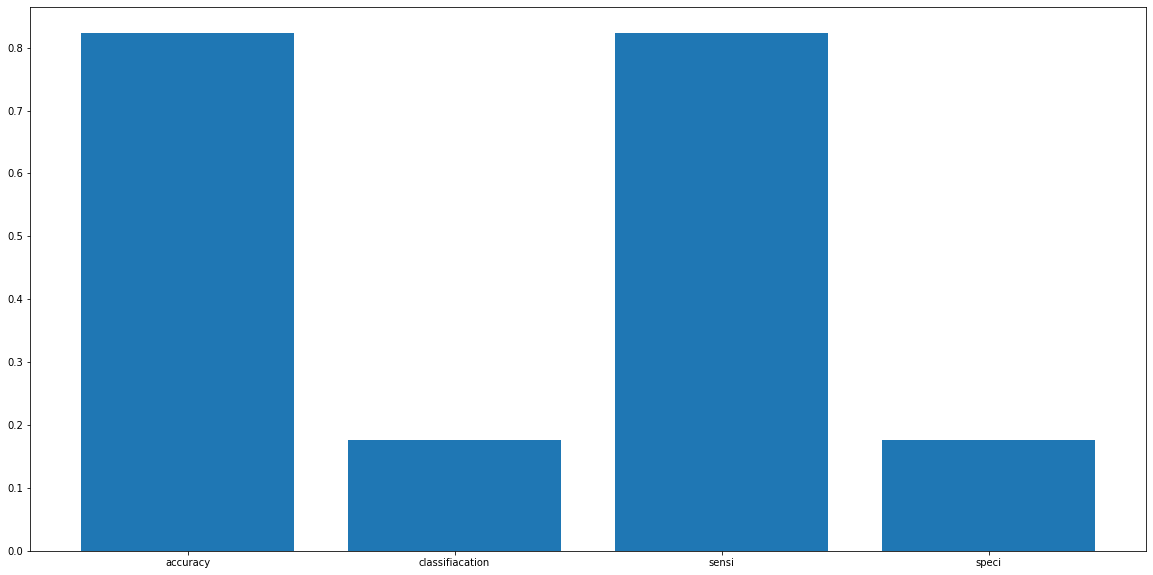

In [8]:
fig = plt.figure(figsize = (20, 10))
plt.bar(list2 , results )